# **Deep Neural Network (DNN) 구현하기**

##0. 텐서플로 버전 선택
- Colab에 기본 설치된 텐서플로 버전은 현재 2.5.0 이다.
- 1.x 버전을 사용해야 하는 경우 선택한다. 
  - 그런데 동작하지 않을 때도 있고 동작할 때도 있다....
  - 런타임 유형이 GPU를 사용하는 유형인 경우 동작하지 않을 때가 많다.

In [ ]:
# %tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

2.5.0


####<br>
#######################################################################################################

## 1. 모듈 임포팅
- 기본적으로 사용할 모듈을 임포팅한다.
- 전체 프로세스에 연관되지 않고 별도로 사용할 모듈은 해당 블럭에서 직접 임포팅하도록 한다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

####<br>
#######################################################################################################

## 2. Colab 시스템의 정보 확인

### 2-1. 디바이스 리스트 보기
- 사용하는 GPU의 목록을 확인한다.
- Colab의 경우, 일반적으로 1개의 GPU / TPU를 지원할 수 있다.

In [ ]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


### 2-2. NVIDIA GPU 상태 확인

In [ ]:
!nvidia-smi

Thu Aug  5 08:44:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    59W / 149W |     60MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

####<br>
#######################################################################################################

## 3. DNN Template

### 3-1. 데이터 준비
- $y=x^2$ : 1차원 데이터 $x$와 $x^2$의 1차원 데이터 $y$ 

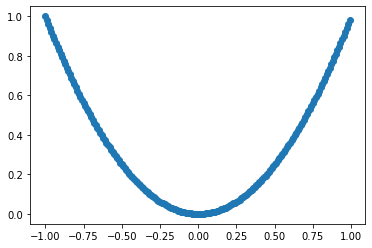

In [ ]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [ ]:
print(len(x))
print(x.shape)

200
(200,)


####<br>

### 3-2. 기본 코드 작성
- DNN을 구현하기 위한 최소한의 기본 코드 작성
- 기본 코드에 최소한의 요구사항 정도만 추가
- 이 정도는 매번 사용하는 코드가 됨

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


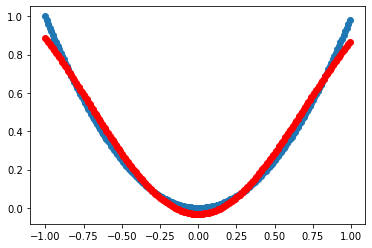

In [ ]:
# 모델 정의
model = Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")


# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)


# 예측
y_ = model.predict(x)


# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

####<br>

### 3-3. 성능 평가하기
- model.evaluate()를 사용하여 기본 DNN 모델의 성능을 평가해보자
- 출력에 loss와 mse를 추가해보자

200/200 [==============================] - 0s 173us/sample - loss: 0.0013 - mean_squared_error: 0.0013
loss= 0.0013152369577437639
mse= 0.0013152368


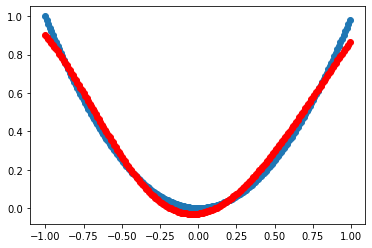

In [ ]:
model = Sequential()
#model.add(Input(1))
model.add(Dense(10, activation='tanh', input_shape=(1,) ))    # 3-2에서 사용한 Input 방식 외에 이런 방식도 사용할 수 있음
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])   # 정보를 보기위한 Key를 metrics에 추가


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)


loss, mse = model.evaluate(x, y) # ADD
print("loss=",loss) # ADD
print("mse=",mse) # ADD


y_ = model.predict(x)


plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

####<br>

### 3-5. 테스트셋으로 평가하기
- 데이터를 train과 test으로 나누어 준비함

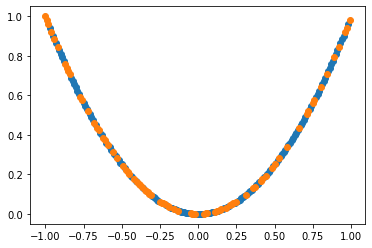

In [ ]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

80/80 [==============================] - 0s 397us/sample - loss: 0.0026 - mean_squared_error: 0.0026
loss= 0.0026039708405733108
mse= 0.002603971


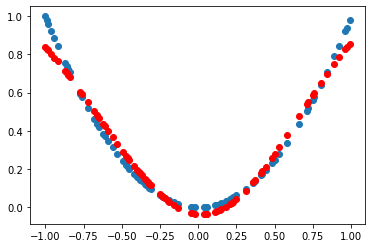

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mse = model.evaluate(x, y)
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

- train_x, train_y로 학습시키고, evaluate()와 predict()에는 test_x, test_y를 사용함
- 그려진 그림을 보면 test_x의 점사이에 빈 간격이 보이는데 그 간격이 train_x에 해당함
####<br>

### 3-6. Base Model 결과 저장
- 이후 비교를 위해 그래프를 저장해 둔다.

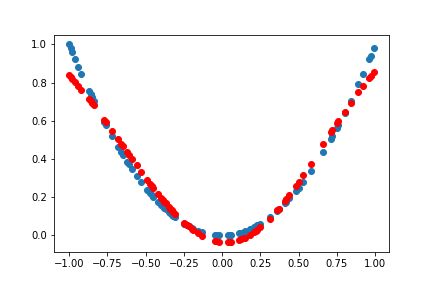

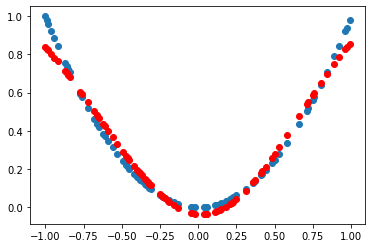

In [ ]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("base_result.png")


from IPython.display import Image
display(Image("base_result.png"))

####<br>

### 3-7. 학습 시간 출력

elapsed : 14.63197946548462
80/80 [==============================] - 0s 407us/sample - loss: 0.0038 - mean_squared_error: 0.0038
loss= 0.0038068922702223064
mse= 0.0038068923


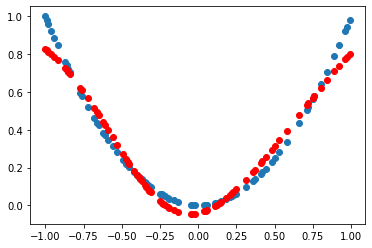

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

start_time = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) # ADD 
    

loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- elapsed로 경과된 시간이 초 단위로 보인다.
####<br>

### 3-8. 구현된 DNN 모양 보기

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 14.508599281311035


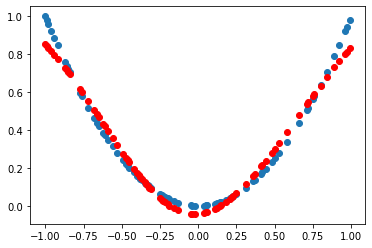

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary() # ADD

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- DNN을 구성하는 네트워크의 모양이 보인다.
- 노드 10개, 10개를 갖는 은닉층 2개가 있다.
- 모든 레이어는 activation(w\*x+b)의 형태를 가진다.
  - 첫 번 째 은닉층은 20개( = ((1+1)\*10) = (입력수+1)\*10)의 웨이트 가진다.
  - 두 번 째 은닉층은 110개( = ( (10+1)\*10) )의 웨이트를 가진다.
####<br>

### 3-9.DNN Template 완성
- 실습에 사용되는 모든 코드의 템플릿

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 14.763720035552979
80/80 [==============================] - 0s 521us/sample - loss: 0.0034 - mean_squared_error: 0.0034
loss= 0.0033857746981084346
mse= 0.0033857748


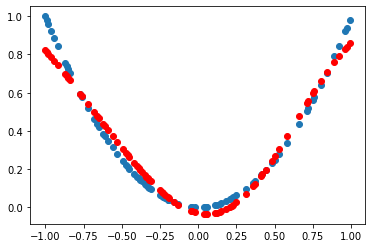

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


# 모델 정의
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>
#######################################################################################################

## 4. DNN 모델의 내부 형태 조정

### 4-1. 히든 레이어 개수 조정

#### 4-1-1. 히든레이어를 1개만

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 14.271748542785645
80/80 [==============================] - 0s 496us/sample - loss: 0.0023 - mean_squared_error: 0.0023
loss= 0.0023347146343439817
mse= 0.0023347146


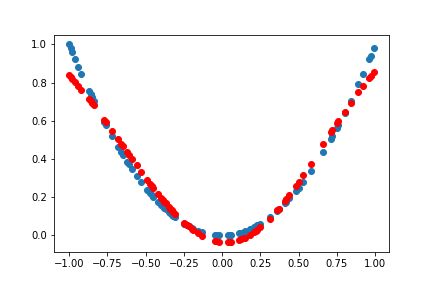

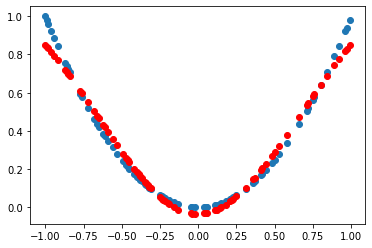

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 히든레이어가 2개에서 1개로 줄어들어도 큰 차이는 없다.
####<br>

#### 4-1-2. 히든레이어가 없을 때

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 13.527222394943237
80/80 [==============================] - 0s 506us/sample - loss: 0.0990 - mean_squared_error: 0.0990
loss= 0.09898537993431092
mse= 0.09898538


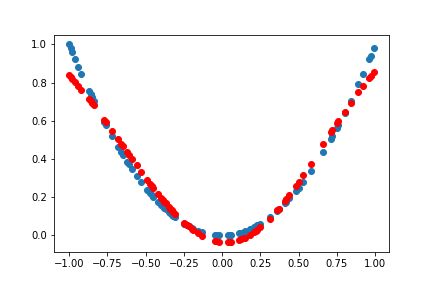

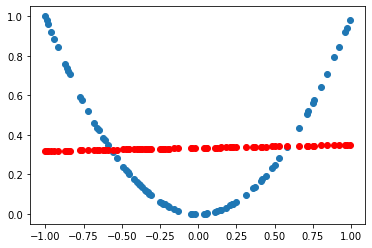

In [ ]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input((1,)))
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 히든 레이어가 없을 경우 학습되지 않는다.
####<br>

#### 4-1-3. 히든 레이어를 3개로

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
elapsed : 15.901660442352295
80/80 [==============================] - 0s 594us/sample - loss: 0.0026 - mean_squared_error: 0.0026
loss= 0.002639476954936981
mse= 0.002639477


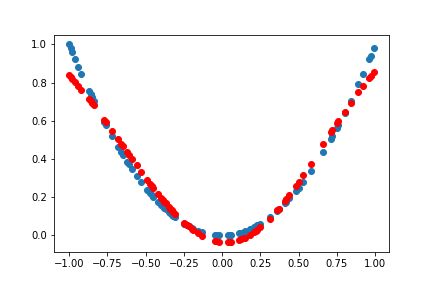

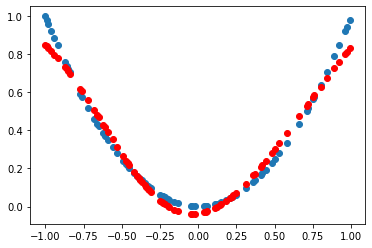

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 3개로 증가해도 별 차이 없다.
####<br>

#### 4-1-4. 히든 레이어를 5개로

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
________________________________________________________

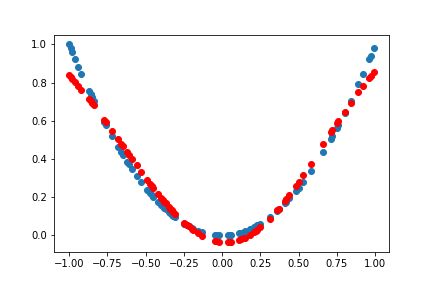

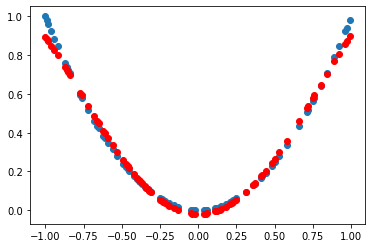

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 5개로 증가하니까 살짝 좋아진 것 같다.
####<br>

#### 4-1-5. 히든 레이어를 10개로

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_37 (Dense)             (None, 10)              

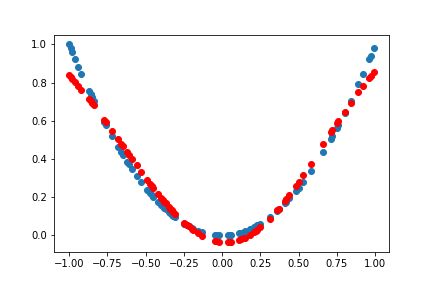

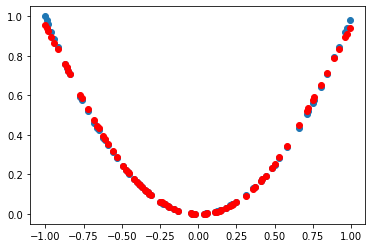

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 10개로 증가했을 때는 더 좋아진 것이 눈에 보인다.
####<br>

### 4-2. node 수 조정하기

#### 4-2-1. node 수를 작게(10개 → 5개)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_43 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 15.625430822372437
80/80 [==============================] - 0s 743us/sample - loss: 0.0016 - mean_squared_error: 0.0016
loss= 0.0015846855007112027
mse= 0.0015846856


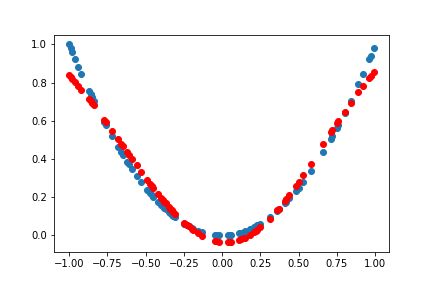

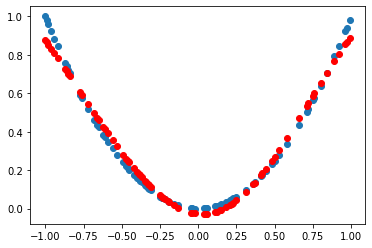

In [ ]:
model = Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh', input_shape=(1,)))    # Modify
model.add(Dense(5, activation='tanh'))    # Modify
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 5개 노드의 경우 살짝 차이가 난다.
####<br>

#### 4-2-2. 노드 수를 아주 작게(10개 → 2개)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
elapsed : 15.801825761795044
80/80 [==============================] - 0s 820us/sample - loss: 0.0056 - mean_squared_error: 0.0056
loss= 0.005593529064208269
mse= 0.005593529


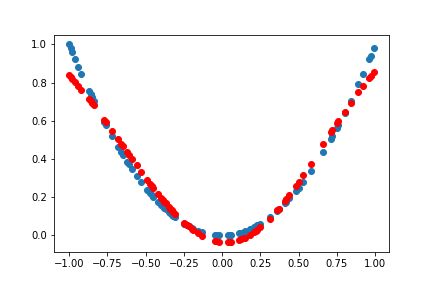

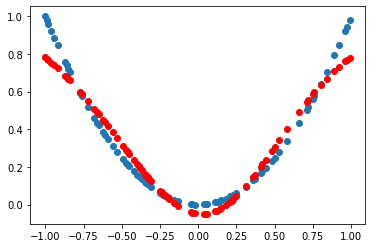

In [ ]:
model = Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='tanh', input_shape=(1,)))    # Modify
model.add(Dense(2, activation='tanh'))    # modify
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 2개의 경우 차이가 좀 더 커 보인다.
####<br>

#### 4-2-3. 노드 수가 1개

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 15.638364553451538
80/80 [==============================] - 0s 808us/sample - loss: 0.0980 - mean_squared_error: 0.0980
loss= 0.09802248924970627
mse= 0.09802248


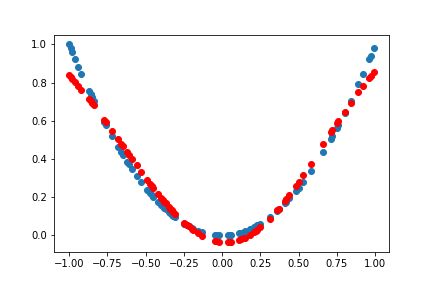

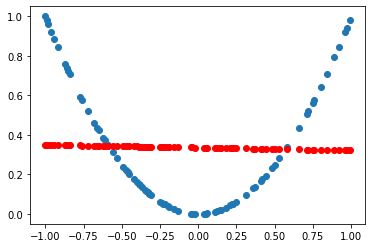

In [ ]:
model = Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh', input_shape=(1,)))      # Modify
model.add(Dense(1, activation='tanh'))      # Modify
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 1개의 경우 학습이 되지 않는다.
####<br>

####<br>
#######################################################################################################

## 5. 학습 내용 조정

### 5-1. 학습 데이터만 변경하기
- 모델은 그대로 두고 데이터만 sin 데이터로 변경한다.

In [ ]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

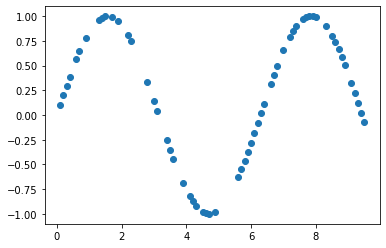

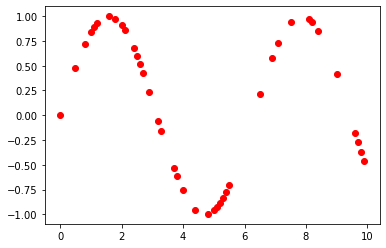

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_52 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.32622504234314
40/40 [==============================] - 0s 2ms/sample - loss: 0.3876 - mean_squared_error: 0.3876
loss= 0.3876316070556641
mse= 0.3876316


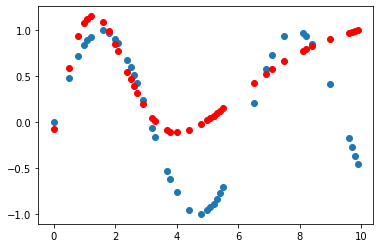

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 학습이 충분히 되지 않았다.
####<br>

### 5-2. 추가 학습 수행하기

In [ ]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)


0 times fitting
elapsed : 8.704404354095459


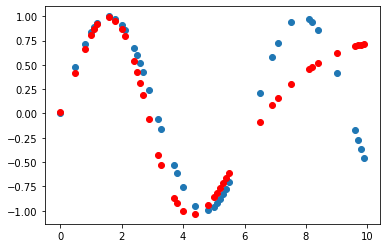

1 times fitting
elapsed : 8.6618971824646


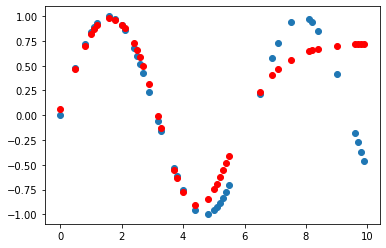

2 times fitting
elapsed : 8.68613600730896


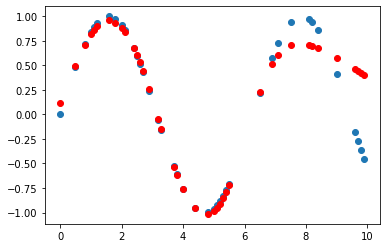

3 times fitting
elapsed : 8.68185043334961


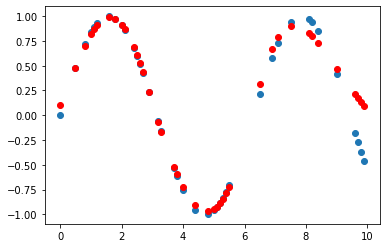

4 times fitting
elapsed : 8.738296031951904


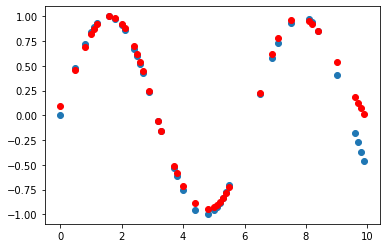

5 times fitting
elapsed : 8.685548782348633


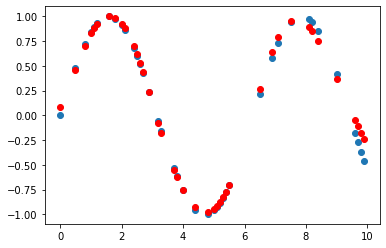

6 times fitting
elapsed : 8.70028305053711


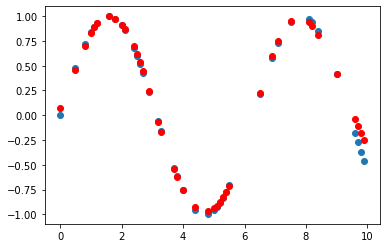

7 times fitting
elapsed : 8.673065900802612


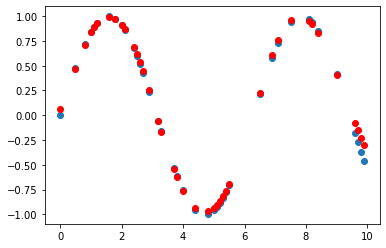

8 times fitting
elapsed : 8.741117000579834


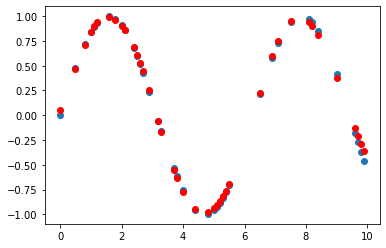

9 times fitting
elapsed : 8.607542276382446


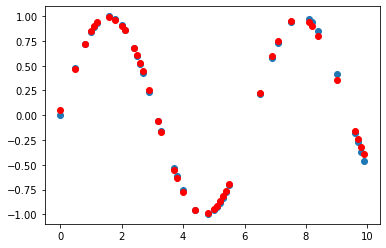

In [ ]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

- 학습이 더 진행되면서 거의 완벽하게 학습된 것을 볼 수 있다.
####<br>

### 5-3. model.fit()의 batch_size
- batch_size는 학습 가능한 모델 변수(가중치 및 바이어스)를 업데이트하기 전에 모델을 학습하는데 사용되는 샘플의 수이다.
- 모든 단일 학습 단계에서는 모델을 통해 샘플 일괄처리가 전파된 다음 역전파 되면서 모든 샘플에 대한 경사를 계산한다.
####<br>
- GPU를 지원하는 시스템에서는 batch_size는 GPU와 관련된 옵션으로 동작한다.
- 한번에 GPU에 보내는 데이터의 수이다.
- batch_size는 GPU의 메모리에 의해 크기가 제한된다.
####<br>
- batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.
- batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.
####<br>
- GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 
- 복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.
####<br>
- 하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.


#### 5-3-1. batch_size 지정

In [ ]:
def build_model():

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

#### 5-3-2. batch_size 적용
- batch_size : [1,2,5,10,20,50,100,200,500]

batch_size=1
elapsed : 140.80858945846558


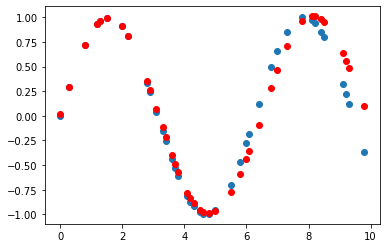

batch_size=2
elapsed : 73.56871962547302


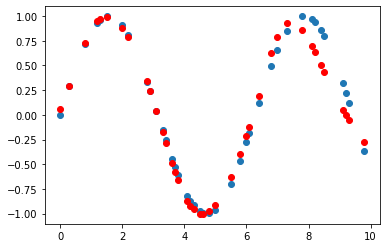

batch_size=5
elapsed : 30.489537715911865


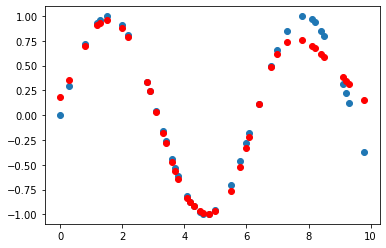

batch_size=10
elapsed : 16.673360347747803


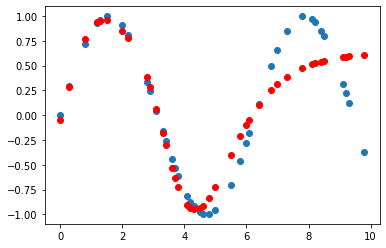

batch_size=20
elapsed : 9.51667046546936


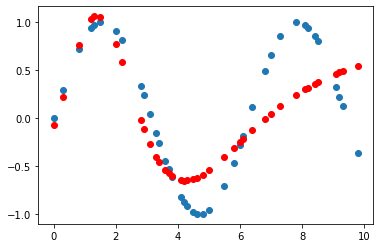

batch_size=50
elapsed : 7.095707416534424


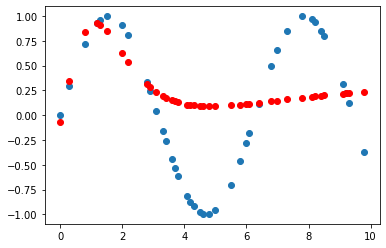

batch_size=100
elapsed : 4.846528768539429


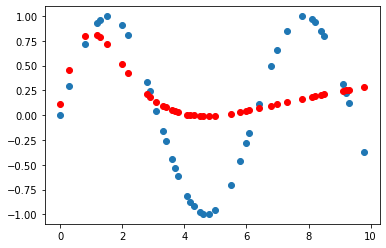

batch_size=200
elapsed : 4.844878673553467


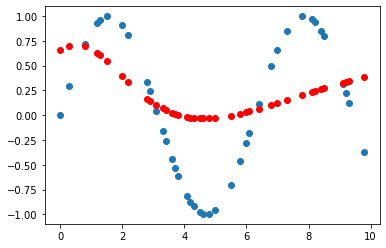

batch_size=500
elapsed : 4.901015281677246


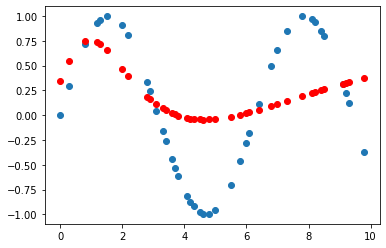

In [ ]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

- 맨 앞의 결과가 batch_size 1인 경우이다. 100개의 데이터를 매번 1개 씩 보냈고, 매번 업데이트 했다.
- batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않는다.
####<br>

### 5-4. 학습이 진행된 내역 보기


#### 5-4-1. model.fit()의 반환값 history
- 반환된 history의 loss로 진행 상황을 확인.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_82 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.832248449325562


In [ ]:
print(history.history['mse'])

KeyError: ignored

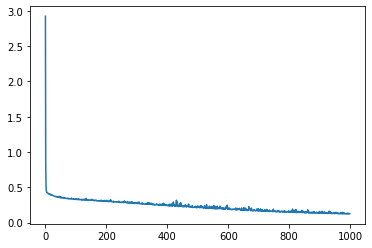

In [ ]:
plt.plot(history.history['loss'])

#### 5-4-2. model.fit() verbose
- 0 : X
- 1 : progress bar
- 2 : 1 line per epoch

In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

print(train_x.shape)

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_88 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Train on 60000 samples
Epoch 1/5
60000/60000 - 8s - loss: 0.2431 - mean_squared_error: 0.2431
Epoch 2/5
60000/60000 - 7s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 3/5
60000/60000 - 7s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 4/5
60000/60000 - 7s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 5/5
60000/60000 - 7s - loss: 0.0134 - mean_squared_error: 0.013

### 5-5. 학습 중 검증(Validation)

#### 5-5-1. model.fit()의 validation_data

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=20, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_91 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Train on 60 samples, validate on 40 samples
Epoch 1/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.4790 - mean_squared_error: 0.4790 - val_loss: 0.4600 - val_mean_squared_error: 0.4600
Epoch 2/1000
60/60 [==============================] - 0s 343us/sample - loss: 0.4813 - mean_squared_error: 0.4813 - val_loss: 0.4517 - val_mean_squared_error: 0.4517
Epoch 3/100

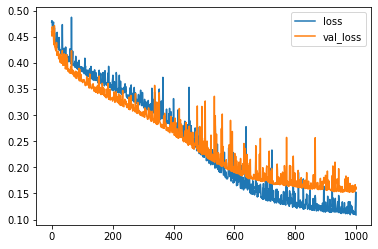

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

####<br>

#### 5-5-2. model.fit()의 validation_split
- 따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용
- validation에 사용된 데이터는 학습에 사용되지 않는다

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_94 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 13.965015172958374


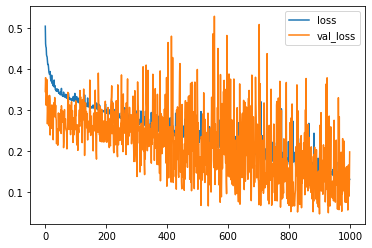

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

####<br>

### 5-6. 데이터 크기와 epoch 수

In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_97 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 - 8s - loss: 0.2489 - mean_squared_error: 0.2489
Epoch 2/5
60000/60000 - 8s - loss: 0.1259 - mean_squared_error: 0.1259
Epoch 3/5
60000/60000 - 7s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 4/5
60000/60000 - 8s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 5/5
60000/60000 - 8s - loss: 0.0176 - mean_squared_error: 0.0176
elapsed

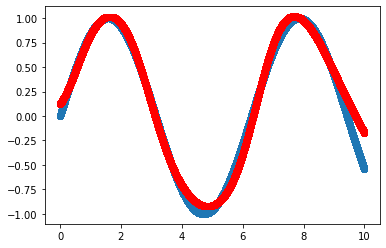

In [ ]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- train_x의 데이터 수가 6000개. epoch는 5. 총 30,000번 업데이트 되었다.
- epoch가 적어도 데이터 수가 많으면 학습 잘된다.
####<br>

### 5-7. model.fit()의 shuffle: 학습 시의 데이터 섞기
- 학습 시에 데이터를 섞어 주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수있다.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_103 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.681690692901611


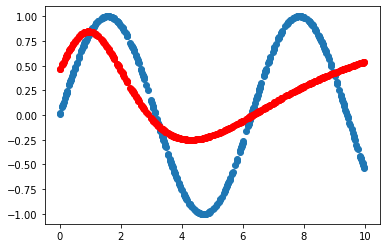

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_106 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.865634918212891


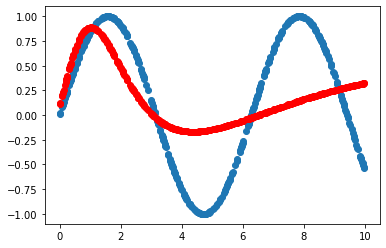

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 학습된 결과가 살짝 향상된 것을 볼 수 있다.
- 편향을 방지하기 위해서라도 항상 shuffle하는 것이 좋다.

####<br>
#######################################################################################################

## 6. 데이터 준비

### 6-1. Shuffle


60


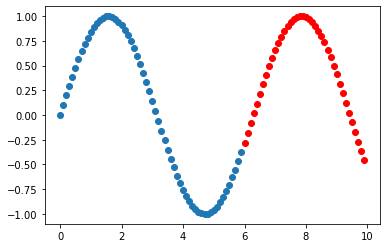

In [ ]:
x = np.arange(0,10,0.1)
# np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_109 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.4757013320922852


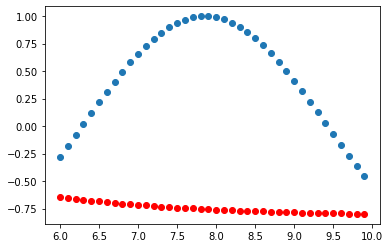

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- train 데이터와 test 데이터가 서로 떨어져 있다.
- train 영역의 데이터로 학습된 모델은 test 영역의 데이터에 적용하지 못한다.
- 전체데이터를 잘 섞어 주고, 이를 train, test로 나누어야 한다.
####<br>

60


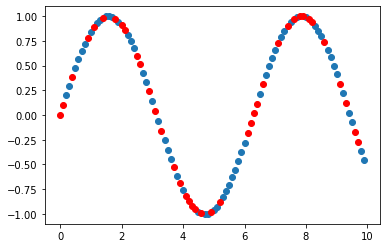

In [ ]:
x = np.arange(0,10,0.1)
np.random.shuffle(x) # UNCOMMENT
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

####<br>

### 6-2. Normalization / Standardization
- 입력이 여러 차원일 때 각 차원의 입력을 동일한 스케일로 맞추어주면, 학습이 빠르게 진행된다고 한다.
  - Normalization : 전체 데이터를 0~1로 변환해준다.
  - Standardization : 평균을 0, 표준편차를 1이되도록 변환해 준다.

min= -9.9
max= 9.899999999999928


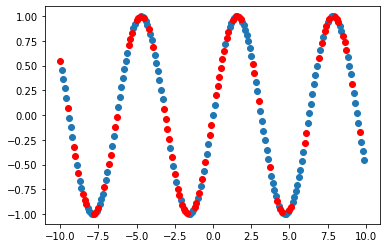

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=-10, end=10, step=0.1)

print("min=",np.min(train_x))
print("max=",np.max(train_x))

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

min= 0.004999999999999982
max= 0.9949999999999963


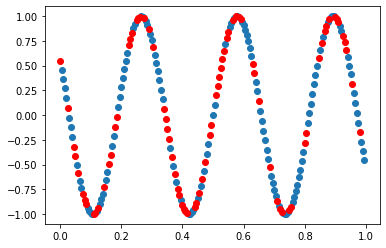

In [ ]:
min = -10 # ADDED
max = 10 # ADDED

train_x = (train_x-min)/(max-min) # ADDED
test_x = (test_x-min)/(max-min) # ADDED

print("min=",np.min(train_x))
print("max=",np.max(train_x))

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_115 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 17.931025743484497
80/80 [==============================] - 0s 2ms/sample - loss: 0.4396 - mean_squared_error: 0.4396
loss= 0.43960835933685305
mse= 0.4396084


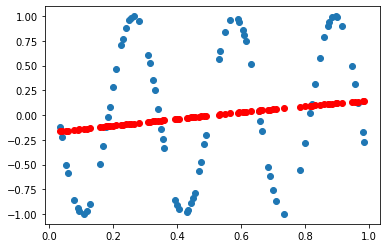

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>
#######################################################################################################

## 7. 모델 저장과 로딩

### 7-1. 학습된 모델의 저장과 로딩

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.351763725280762
2/2 [==============================] - 0s 5ms/step - loss: 0.1780 - mse: 0.1780
loss= 0.17796802520751953
mse= 0.17796802520751953


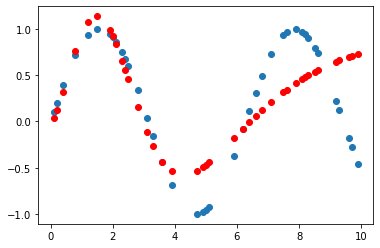

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>

#### 7-1-1. 모델 저장

In [ ]:
model.save('my_model.h5')

!ls -al

total 36
drwxr-xr-x 1 root root  4096 Aug  5 11:28 .
drwxr-xr-x 1 root root  4096 Aug  5 11:26 ..
drwxr-xr-x 4 root root  4096 Jul 16 13:19 .config
-rw-r--r-- 1 root root 19808 Aug  5 11:32 my_model.h5
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


#### 7-1-2. 모델 로딩

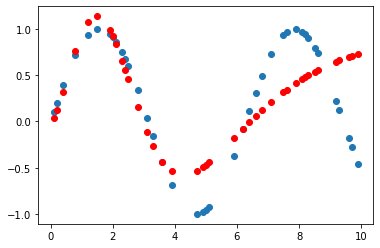

In [ ]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>

### 7-2. TensorFlow 포멧의 저장과 로딩
- 기존에 사용하던 keras.experimental.export_saved_model(model, 'model_path') 는 deprecated 되었음
- 새로운 방법
  - tf.keras.models.save_model(model, path, save_format="tf")
  - model.save(path, save_format="tf")
####<br>
- new_model = keras.experimental.load_from_saved_model('model_path') 는 deprecated 되었음
- 새로운 방법
  - new_model = keras.models.load_model(path)

INFO:tensorflow:Assets written to: model_path/assets
total 40
drwxr-xr-x 1 root root  4096 Aug  5 11:35 .
drwxr-xr-x 1 root root  4096 Aug  5 11:26 ..
drwxr-xr-x 4 root root  4096 Jul 16 13:19 .config
drwxr-xr-x 4 root root  4096 Aug  5 11:35 model_path
-rw-r--r-- 1 root root 19808 Aug  5 11:32 my_model.h5
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data
total 100
drwxr-xr-x 4 root root  4096 Aug  5 11:35 .
drwxr-xr-x 1 root root  4096 Aug  5 11:35 ..
drwxr-xr-x 2 root root  4096 Aug  5 11:35 assets
-rw-r--r-- 1 root root  8002 Aug  5 11:35 keras_metadata.pb
-rw-r--r-- 1 root root 77289 Aug  5 11:35 saved_model.pb
drwxr-xr-x 2 root root  4096 Aug  5 11:35 variables


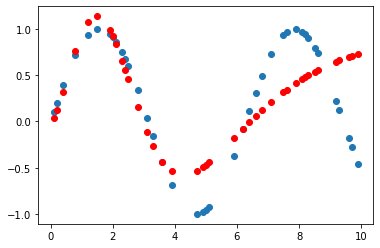

In [ ]:
# keras.experimental.export_saved_model(model, 'model_path')   ---> deprecated
keras.models.save_model(model, 'model_path', save_format='tf')
# model.save('model_path', save_format="tf")

!ls -al
!ls -al model_path

# new_model = keras.experimental.load_from_saved_model('model_path')   ---> deprecated
new_model = keras.models.load_model('model_path')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>
#######################################################################################################

## 8. GPU 사용하기
- Colab의 경우, 따로 명시하지 않으면 default로 GPU를 사용한다.
- 명시적으로 설정할 수도 있다.

### 8-1. 디바이스 목록 보기

In [ ]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


### 8-2. 디바이스 설정하기
- 다음과 같은 디바이스를 설정할 수 있다.
  - /device:GPU:0
  - /GPU:0
  - /gpu:0
  - /gpu
  - /cpu:0
  - /cpu

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.9824094772338867


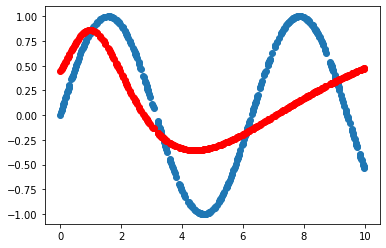

In [ ]:
with tf.device('/device:GPU:0'): # ADDED

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.792597770690918


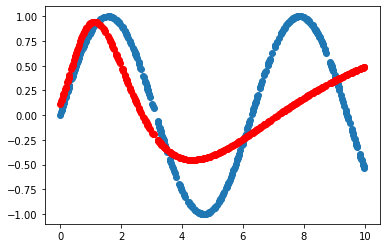

In [ ]:
# with tf.device('/device:GPU:0'):
with tf.device('/GPU:0'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.7949118614196777


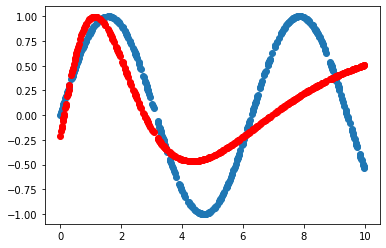

In [ ]:
# with tf.device('/device:GPU:0'):
with tf.device('/gpu:0'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.9671299457550049


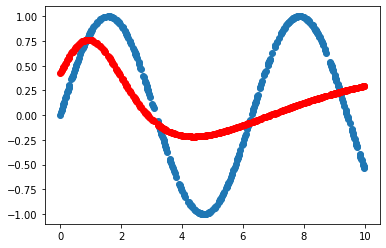

In [ ]:
# with tf.device('/GPU:0'):
with tf.device('/gpu:0'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.7744200229644775


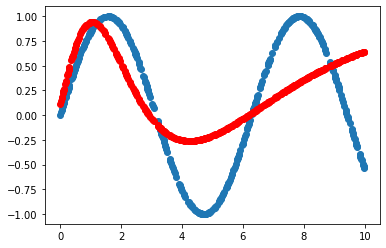

In [ ]:
# with tf.device('/GPU:0'):
with tf.device('/gpu'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.4939541816711426


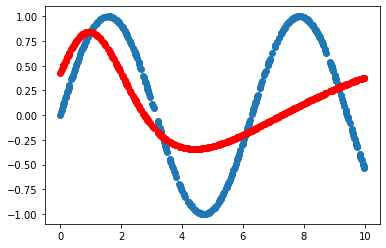

In [ ]:
# with tf.device('/GPU:0'):
with tf.device('/CPU:0'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.4468469619750977


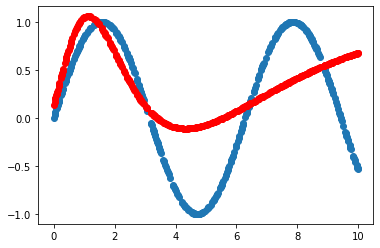

In [ ]:
# with tf.device('/GPU:0'):
with tf.device('/CPU'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

####<br>
#######################################################################################################

## 9. 과적합(Overfitting) 처리
- DropOut
- BatchNormalization
- Regularization

### 9-1. DropOut 레이어

In [ ]:
from tensorflow.keras.layers import Dropout

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                20        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.441790580749512
2/2 [==============================] - 0s 7ms/step - loss: 0.2064 - mse: 0.2064
loss= 0.2063552886247635
mse= 0.2063552886247635


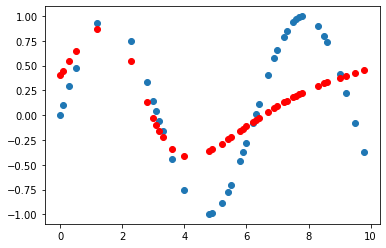

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dropout(0.1)) # ADDED
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>

### 9-2. BatchNormalization 레이어

In [ ]:
from tensorflow.keras.layers import BatchNormalization

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                20        
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 11        
Total params: 181
Trainable params: 161
Non-trainable params: 20
_________________________________________________________________
elapsed : 10.773311614990234
2/2 [==============================] - 0s 7ms/step - loss: 0.0757 - mse: 0.0757
loss= 0.07572689652442932
mse= 0.07572689652442932


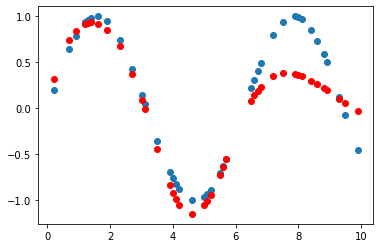

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>

### 9-3. Regularization
- Dense() 생성시에 kernel_regularization, bias_regularization으로 설정한다.
  - l1()
  - l1_l2()
  - l2()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.370571136474609
2/2 [==============================] - 0s 5ms/step - loss: 0.4447 - mse: 0.4305
loss= 0.44468751549720764
mse= 0.4305020868778229


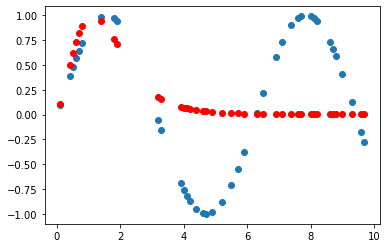

In [ ]:
from tensorflow.keras.regularizers import l1, l2

(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', input_shape=(1,), kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

### 9-4. 데이터 크기와 과적합
- 과적합을 해결하는 가장 좋은 방법은 데이터를 늘리는 것이다.
- 데이터의 확보가 쉬운 작업이 아니기때문에 다양한 방법이 제안되었다.

### 9-5. 과적합 예시
- 데이터 준비

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame


In [ ]:
def create_data_with_total_size(total_size=100, train_ratio=0.8):
  x, y = make_moons(n_samples=total_size, noise=0.2, random_state=1)

  df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
  colors = {0:'red', 1:'blue'}
  fig, ax = pyplot.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  pyplot.show()

  split_index = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


- 데이터의 개수에 따른 과적합의 형태별 그래프

In [ ]:
def show_overfitting(total_data_count, train_ratio):

  (train_x, train_y), (test_x, test_y) = create_data_with_total_size(total_data_count, train_ratio)

  model = Sequential()
  model.add(Dense(500, input_shape=(2,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=2000, verbose=0, batch_size=64)

  pyplot.plot(history.history['loss'], label='train_loss')
  pyplot.plot(history.history['val_loss'], label='test_loss')
  pyplot.legend()
  pyplot.show()

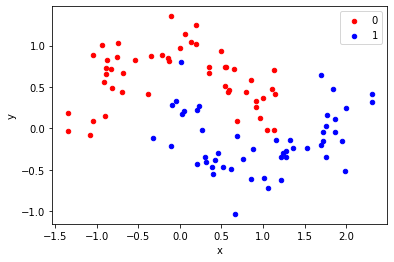

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


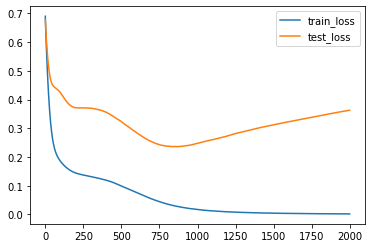

In [ ]:
show_overfitting(total_data_count=100, train_ratio=0.3)

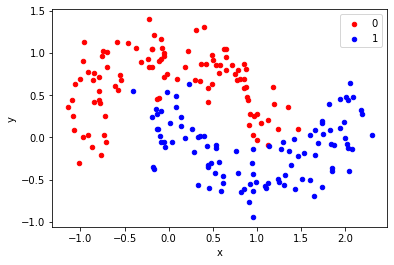

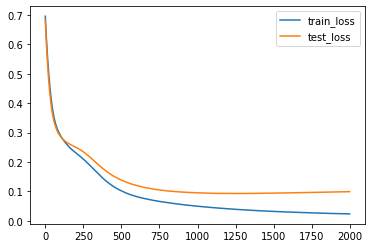

In [ ]:
show_overfitting(total_data_count=200, train_ratio=0.3)

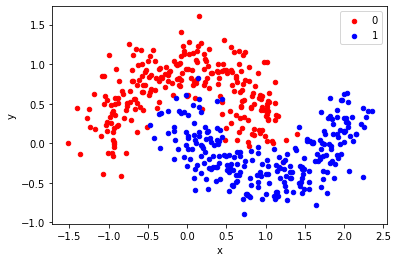

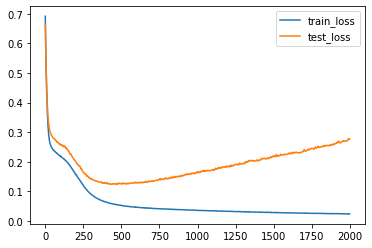

In [ ]:
show_overfitting(total_data_count=500, train_ratio=0.3)

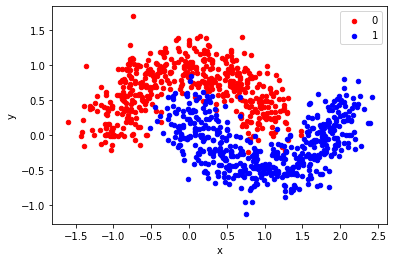

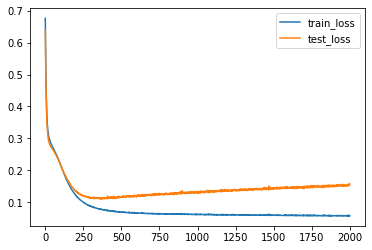

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.3)

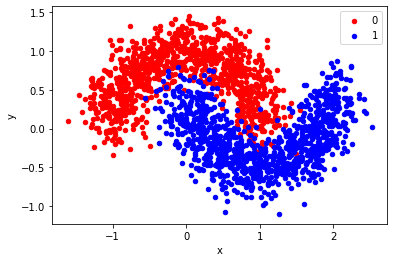

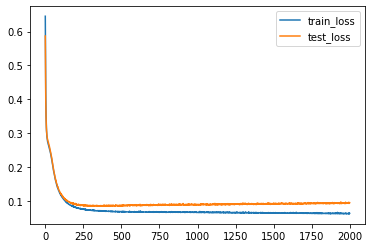

In [ ]:
show_overfitting(total_data_count=2000, train_ratio=0.3)

- 데이터의 비율에 따른 과적합의 형태별 그래프

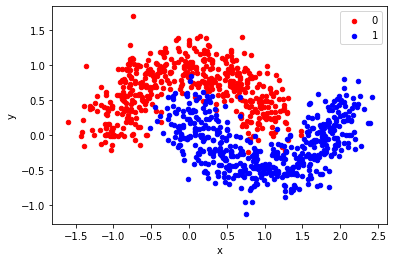

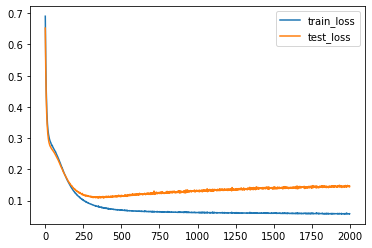

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.3)

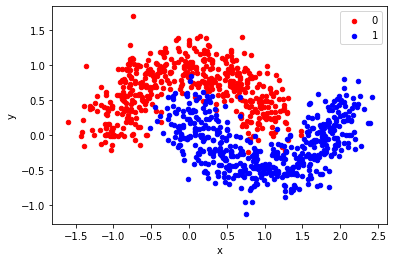

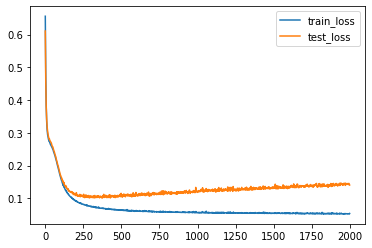

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.4)

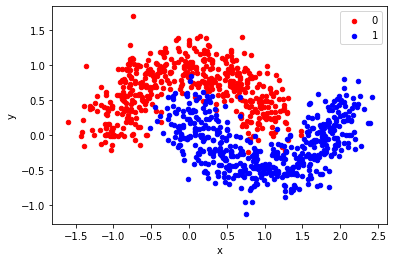

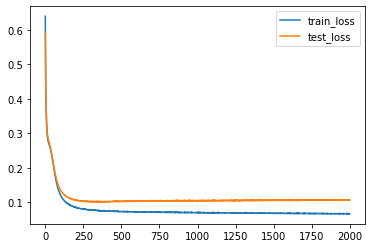

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.5)

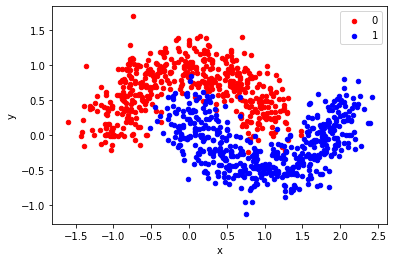

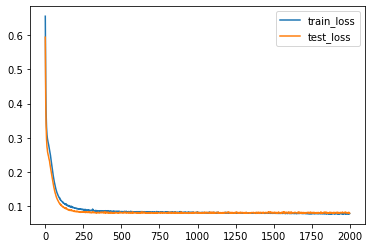

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.6)

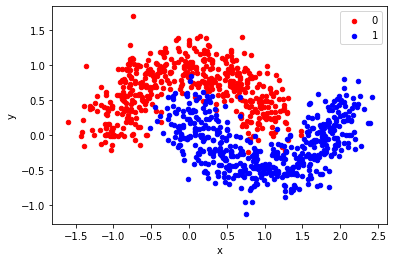

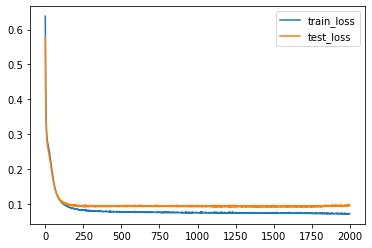

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.7)

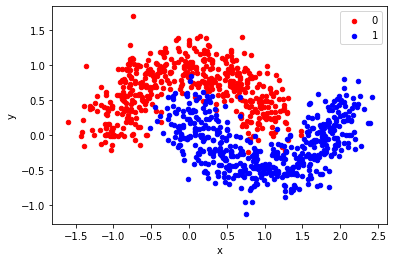

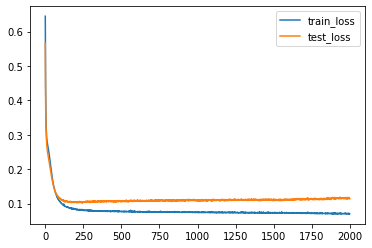

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.8)

####<br>
#######################################################################################################

## 10. 가중치 초기화
- Dense() 생성시에 kernel_initializer, bias_initializer로 설정한다.
  - 'he_normal'
  - 'lecun_normal'

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_38 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.037625074386597
2/2 [==============================] - 0s 9ms/step - loss: 0.1696 - mse: 0.1696
loss= 0.16956107318401337
mse= 0.16956107318401337


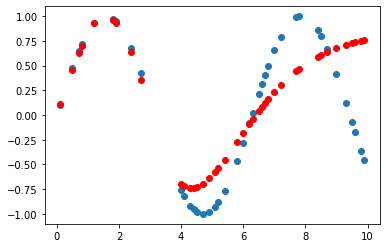

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', input_shape=(1,), kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>
#######################################################################################################

## 11. 노이즈

In [ ]:
def train_sin_with_noise(noise_size):

  # x = np.arange(0,10,0.1)
  x = np.arange(0,10,0.001)
  np.random.shuffle(x)
  y = np.sin(x)

  noiseless_y = np.copy(y) # ADD
  y = y + np.random.rand(y.shape[0])*noise_size - noise_size/2.0 # ADD

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]
  test_noiseless_y = noiseless_y[split_index:] # ADD

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()


  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=100)
  print("elapsed : {}".format(time.time() - start_time))    


  loss, mse = model.evaluate(test_x, test_y)
  print("loss=",loss)
  print("mse=",mse)


  y_ = model.predict(test_x)

  # plt.scatter(test_x,test_y)
  plt.scatter(test_x,test_y, s=1)
  plt.scatter(test_x,y_, s=1)
  plt.show()

####<br>

### 11-1. 노이즈가 없을 때

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 82.12881374359131
125/125 [==============================] - 0s 1ms/step - loss: 5.9683e-05 - mse: 5.9683e-05
loss= 5.968259210931137e-05
mse= 5.968259210931137e-05


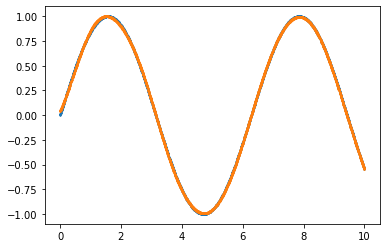

In [ ]:
train_sin_with_noise(0.0)

####<br>

### 11-2. 노이즈 크기 0.1

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 64.88514256477356
125/125 [==============================] - 0s 1ms/step - loss: 9.4878e-04 - mse: 9.4878e-04
loss= 0.000948784698266536
mse= 0.000948784698266536


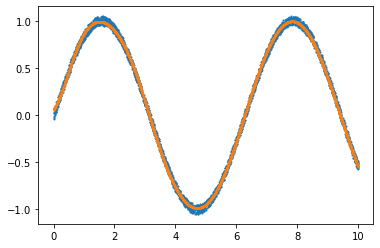

In [ ]:
train_sin_with_noise(0.1)

####<br>

### 11-3. 노이즈 크기 0.5

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 58.19062066078186
125/125 [==============================] - 0s 1ms/step - loss: 0.0211 - mse: 0.0211
loss= 0.021053800359368324
mse= 0.021053800359368324


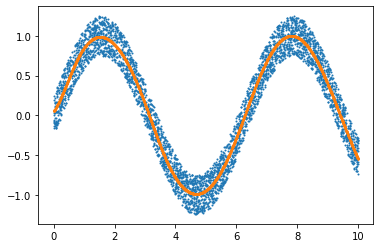

In [ ]:
train_sin_with_noise(0.5)

####<br>

### 11-4. 노이즈 크기 1.0

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 56.441752910614014
125/125 [==============================] - 0s 1ms/step - loss: 0.0856 - mse: 0.0856
loss= 0.08558066189289093
mse= 0.08558066189289093


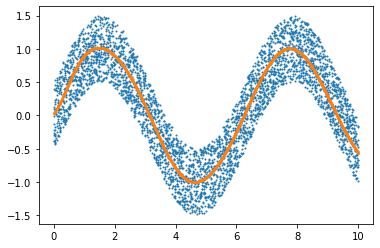

In [ ]:
train_sin_with_noise(1.0)

####<br>

### 11-5. 노이즈 크기 10.0

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 58.041136026382446
125/125 [==============================] - 0s 1ms/step - loss: 8.3251 - mse: 8.3251
loss= 8.325140953063965
mse= 8.325140953063965


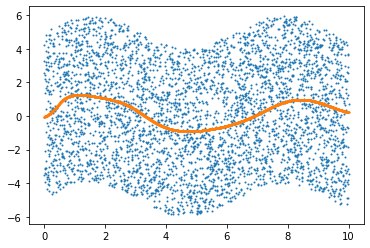

In [ ]:
train_sin_with_noise(10.0)

####<br>

### 11-6. 노이즈 피쳐
- 노이즈 입력을 하나 더 준다.

In [ ]:
x = np.arange(0,10,1.0)
np.random.shuffle(x)

y = np.zeros((x.shape[0],2))
y[:,0] = np.sin(x)
y[:,1] = np.random.rand(x.shape[0])


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_44 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 1s 1ms/step - loss: 0.3962 - mse: 0.3962
Epoch 2/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3345 - mse: 0.3345
Epoch 3/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2981 - mse: 0.2981
Epoch 4/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2633 - mse: 0.2633
E

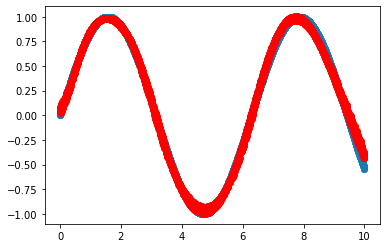

In [ ]:
# x = np.arange(0,10,0.001)
x = np.zeros((10000,2))
x[:,0] = np.arange(0,10,0.001) # ADD
x[:,1] = np.random.rand(x.shape[0]) # ADD
np.random.shuffle(x)

# y = np.sin(x)
y = np.sin(x[:,0])

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x[:,0],test_y)
plt.scatter(test_x[:,0],y_,color='r')
plt.show()

####<br>
#######################################################################################################

## 12. 학습 되지 않는 랜덤 함수
- 랜덤 한수의 경우 x와 y의 간에 관계가 없다.
- 입출력 간에 관계가 없는 함수로 학습되지 않는다.

60


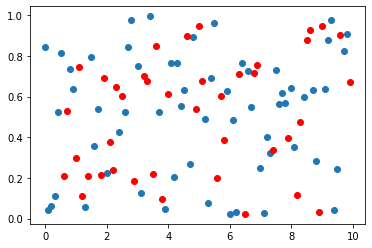

In [ ]:
x = np.arange(0,10,0.1)
np.random.shuffle(x)
# y = np.sin(x)
y = np.random.random_sample(x.shape[0])

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

####<br>
#######################################################################################################

## 13. CallBack
- 학습 도중 로그 출력이나 모델저장 등 다양한 액션을 취할 수 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

import time

In [ ]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
def train_with_callbacks(callbacks):

  # 모델 정의
  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  # 모델 컴파일
  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()


  # 학습
  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, callbacks=callbacks)
  print("elapsed : {}".format(time.time() - start_time))

####<br>

### 13-1. 모델 저장

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_check_point = ModelCheckpoint('best_model.h5',      # 저장될 모델 파일 이름
                                    monitor='val_loss',   # 모니터링 대상
                                    mode='min',           # 최소일 경우를 최적의 학습상태로 인식
                                    save_best_only=True)  # 베스트일 때만 저장

train_with_callbacks([model_check_point])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_47 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 27.84955883026123


####<br>

### 13-2. 로스 출력

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])



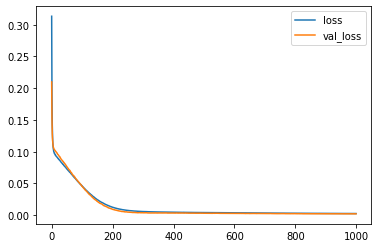

loss =  0.002572147874161601 , val_loss =  0.002094133524224162
elapsed : 202.1797833442688


In [ ]:
plot_losses = PlotLosses()

train_with_callbacks([plot_losses])

####<br>

### 13-3. early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=50)         # 중지까지의 여유분

train_with_callbacks([early_stopping])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_53 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 22.53203535079956


####<br>

### 13-4. 학습율 조정
- 학습 과정을 모니터링 하면서 진척되지 않으면 학습율을 조정한다.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # 모니터링 대상
                              factor=0.2,         # 줄이는 양
                              patience=5,         # 대상 기간동안 유지
                              min_lr=0.001)       # 최소 학습율

train_with_callbacks([reduce_lr])

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_56 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 23.768468618392944


####<br>

### 13-5. 모두 한번에

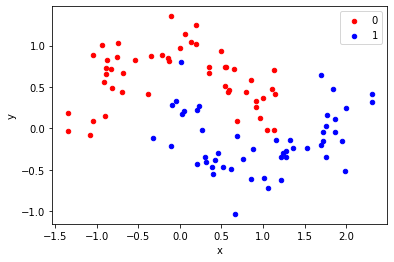

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame

x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

pyplot.show()

split_index = 30
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)

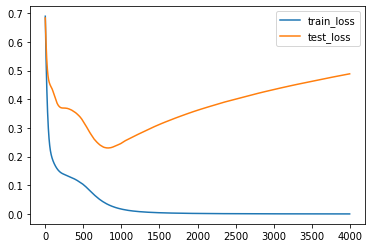

In [ ]:
# copy from https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


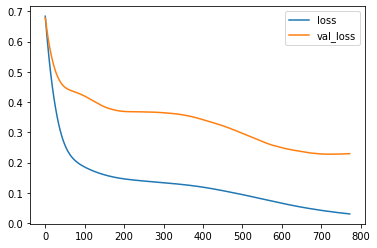

loss =  0.029935847967863083 , val_loss =  0.2293751835823059
Epoch 00773: early stopping


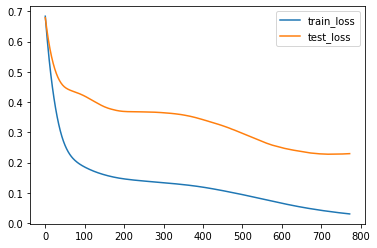

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]


# history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0, callbacks=callbacks)


pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


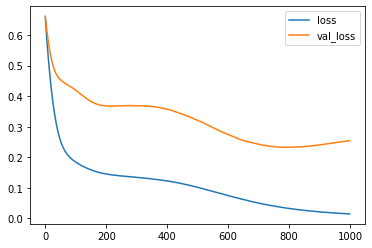

loss =  0.014261548407375813 , val_loss =  0.2544109275298459


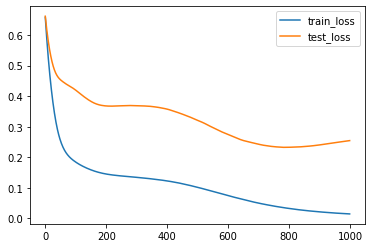

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [model_check_point, plot_losses, reduce_lr]


# history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1000, verbose=0)
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1000, verbose=0, callbacks=callbacks)


pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


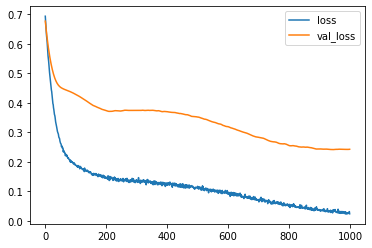

loss =  0.023896515369415283 , val_loss =  0.24271832438451904


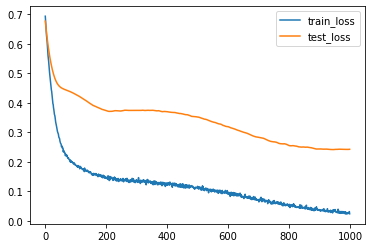

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dropout(0.1)) # ADD
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [model_check_point, plot_losses, reduce_lr]


# history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1000, verbose=0)
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1000, verbose=0, callbacks=callbacks)


pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


####<br>
#######################################################################################################

## 14. 다양한 입출력

### 14-1. 2개의 입력, 1개의 출력
- $x_1 + x_2 \rightarrow y$의 함수를 학습
- $x_1$과 $x_2$는 0~10의 범위를 갖는다.

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_63 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 23.724827766418457
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - mse: 0.0066
loss= 0.006602565757930279
mse= 0.006602565757930279


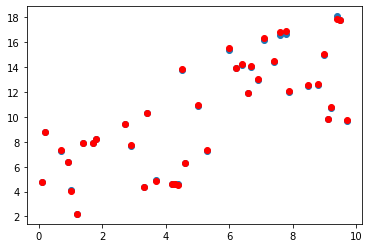

In [ ]:

x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2
np.random.shuffle(x)

y = np.sum(x, axis=1)


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]



from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y)
plt.scatter(test_x.T[0],y_, color="r")
plt.show()

In [ ]:
print(x.shape)
print(x[:5])
print(y[:5])

(100, 2)
[[5.5 3.7]
 [1.1 4.4]
 [5.8 5.1]
 [4.8 7.2]
 [8.3 9.5]]
[ 9.2  5.5 10.9 12.  17.8]


####<br>

### 14-2. 1개의 입력, 2개의 출력
- 다음과 같이 y는 2개의 값을 갖고, $y_1 = x%2$, $y_2=x%3$인 함수를 학습

```
x = np.arange(0,10,0.1)
y1 = x%2
y2 = x%3
```


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_66 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_67 (Dense)             (None, 2)                 22        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 82.15025591850281
2/2 [==============================] - 0s 6ms/step - loss: 0.3814 - mse: 0.3814
loss= 0.3814474642276764
mse= 0.3814474642276764


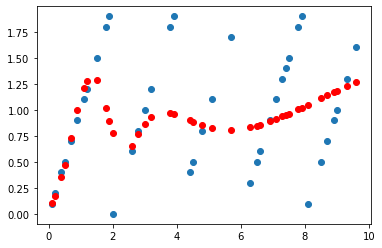

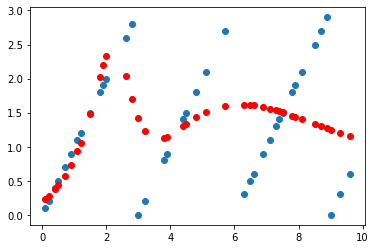

In [ ]:
x = np.arange(0, 10, 0.1)
np.random.shuffle(x)
y1 = x%2
y2 = x%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x,test_y[:,0])
plt.scatter(test_x,y_[:,0], color="r")
plt.show()

plt.scatter(test_x,test_y[:,1])
plt.scatter(test_x,y_[:,1], color="r")
plt.show()


####<br>

### 14-4. 2개의 입력, 2개의 출력
- $x_1 + x_2 \rightarrow z$, 
- $y_1 = z%2$, $y_2=z%3$인 함수를 학습
- $x_1$과 $x_2$는 0~10의 범위를 갖는다.

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_69 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 49.32855701446533
2/2 [==============================] - 0s 5ms/step - loss: 0.6805 - mse: 0.6805
loss= 0.6805120706558228
mse= 0.6805120706558228


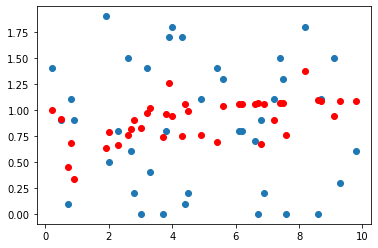

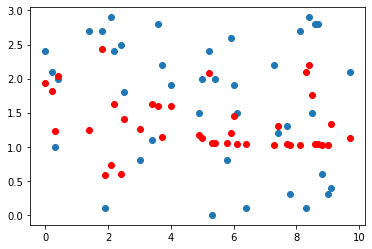

In [ ]:
x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2

z = x1 + x2
y1 = z%2
y2 = z%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y[:,0])
plt.scatter(test_x.T[0],y_[:,0], color="r")
plt.show()

plt.scatter(test_x.T[1],test_y[:,1])
plt.scatter(test_x.T[1],y_[:,1], color="r")
plt.show()
